#### Kaggle tmdb-box-office-prediction competition

https://www.kaggle.com/c/tmdb-box-office-prediction

#### Import and View Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import seaborn as sns
import re

In [4]:
df_modified = pd.read_csv('train.csv/train.csv',encoding='latin1')
df = df_modified
df.head(1)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/2015,93.0,"{'iso_639_1': 'en', 'name': 'English'}",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651


In [33]:
import re
for i in range(5):
    #print(df['cast'][i])
    df_cast_character = re.findall('\'character\': \'(.*?)\'', df['cast'][i])
    print(df_cast_character)

['Lou', 'Nick', 'Jacob', 'Adam Jr.', 'Hot Tub Repairman', 'Jill', 'Sophie', 'Kelly', 'Brad', 'Courtney', 'Terry', 'Susan', 'Herself', 'Herself', 'Himself', 'Shot Girl', 'Choozy Doozy Host', 'Gary Winkle', 'Bridesmaid', 'Christine', 'Excited Girl', 'Adam (uncredited)', 'J-Bird', 'Bridesmaid']
['Mia Thermopolis', 'Queen Clarisse Renaldi', 'Joe', 'Viscount Mabrey', 'Lilly Moscovitz', 'Nicholas Devereaux', 'Andrew Jacoby', 'Paolo', 'Asana', 'Charlotte Kutaway', 'Princess Lorraine', 'Lady Salsa', 'Baron Siegfried von Troken', 'Carolina', 'Lord Crawley', 'Monsieur Dupont', 'Lady Caroline', 'Lord Peroit', 'Genovian Cafe Owner']
['Andrew Neimann', 'Terence Fletcher', 'Nicole', 'Ryan', 'Travis', 'Assistant - Sophie', 'Mr. Neyman', 'Carl Tanner', 'Uncle Frank', 'Mr. Kramer', 'Aunt Emma', 'Dorm Neighbor', 'Dustin', 'Bassist (Nassau)', 'Metz', 'Pianist (Studio Band)', 'Saxophonist #2 (Studio Band)', 'Trumpeter #1 (Studio Band)', 'Trumpeter #2 (Studio Band)', 'Technician (Overbrook) - Mike', 'Stage

In [15]:
if 'cast' in df:
    print(df['cast'].head(5))
    df_cast_character = df['cast'].str.extractall('character\': (["\'])(\\?.)*?\1')
    #df_cast_character = df_cast_character.unstack(level=1,fill_value='Not Found')
df_cast_character.head(3)

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object


,,0,1
,match,,


#### Clean Data

Drop unique columns

In [3]:
df = df.drop(['imdb_id'], axis=1)

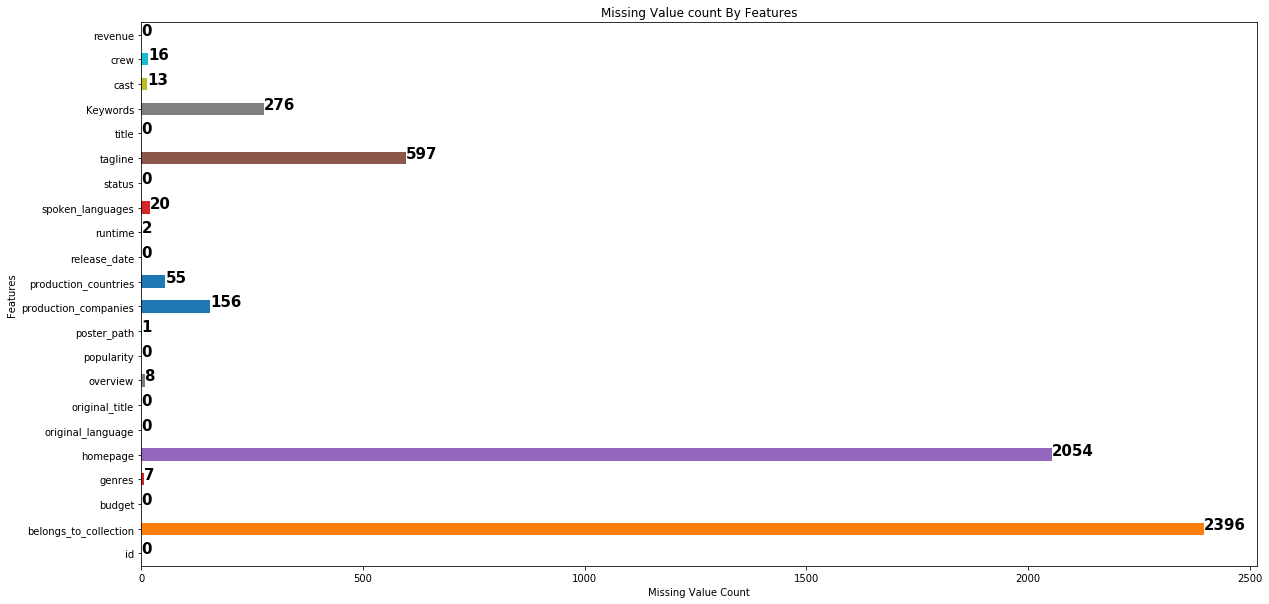

In [4]:
def NullCheckGraph(df):
    df.isna().sum().plot(kind="barh", figsize=(20,10))
    for i, v in enumerate(df.isna().sum()):
        plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
    plt.xlabel("Missing Value Count")
    plt.ylabel("Features")
    plt.title("Missing Value count By Features")
    
NullCheckGraph(df)

Drop column where 70% data is null

In [5]:
df = df.drop(['belongs_to_collection', 'homepage'],axis = 1)

Drop rows with Null values

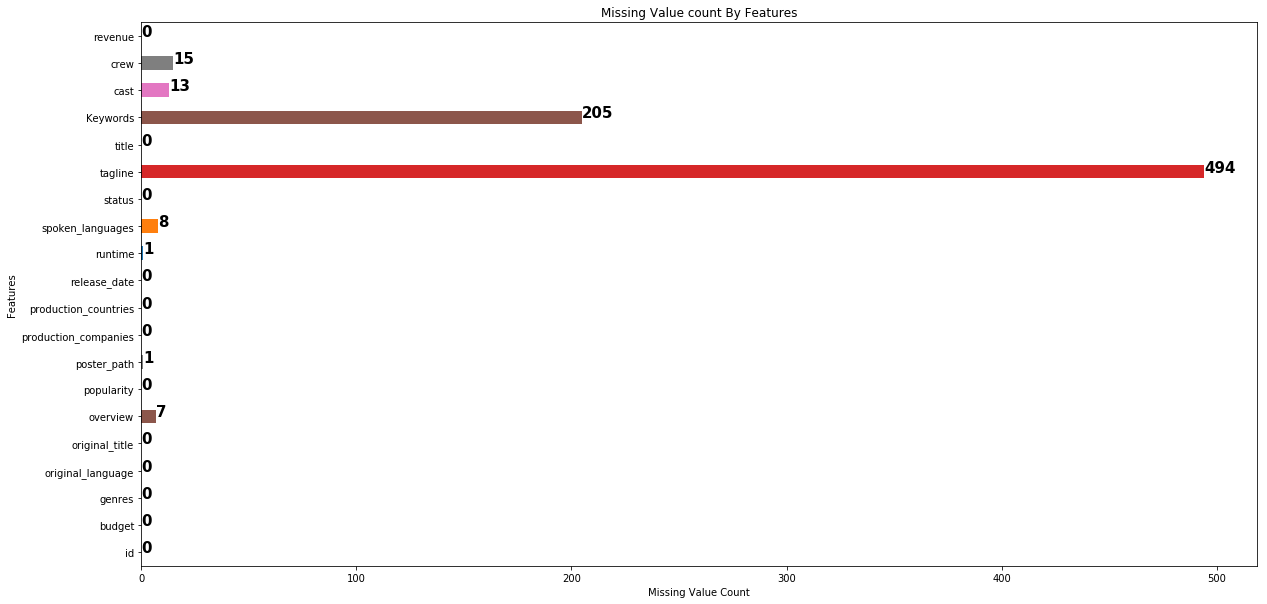

In [6]:
df =df.dropna(subset = ['production_companies'])
df =df.dropna(subset = ['production_countries'])
NullCheckGraph(df)

##### Cleaning genres column

In [7]:
#df['genres'] = df['genres'].astype(str)
if 'genres' in df:
    df_genres = df['genres'].str.extractall('([A-Z]\w{0,})')
    df_genres = df_genres.unstack(level=1,fill_value='Not Found')
    df_genres.columns = ['genres_1', 'genres_2', 'genres_3', 'genres_4', 'genres_5', 'genres_6', 'genres_7', 'genres_8']
df_genres.head(3)

df['genres_1'] = df_genres['genres_1']
df['genres_2'] = df_genres['genres_2']
df['genres_3'] = df_genres['genres_3']
df['genres_4'] = df_genres['genres_4']
df['genres_5'] = df_genres['genres_5']
df['genres_6'] = df_genres['genres_6']
df['genres_7'] = df_genres['genres_7']
df_modified['genres_8'] = df_genres['genres_8']

Drop old column and add new column

##### Cleaning production_companies column

In [8]:
res = []
if 'production_companies' in df:
    df_production_companies = df['production_companies']
    #print(df_production_companies[0])
    for i in range(len(df_production_companies)):
        if i in df_production_companies:
            name_per_production = []
            row_array = df_production_companies[i].split(':')
            for j in range(len(row_array)):                
                if('id' in row_array[j]):
                    row_array[j] = row_array[j].replace('\'',' ')
                    #print(row_array[j].split(',')[0])
                    name_per_production.append(row_array[j].split(',')[0])
            #print('break')
            res.append(name_per_production)
            #for j in range(len(row_text)):
            #    print(row_text[j])
res[3]

['  Ghost House Pictures ', '  North Box Productions ']

##### Cleaning production_countries column

In [9]:
#df_genres = df['genres'].str.extractall('([A-Z]\w{0,})')

if 'production_countries' in df:
    df_production_countries = df['production_countries'].str.extractall('([A-Z]\w{0,}[A-Z])')    
    #df_production_countries = df_production_countries.unstack(level=1,fill_value='Not Found')
    #df_production_countries.columns = ['Country_1', 'Country_1', 'Country_1', 'Country_1']
df_production_countries.head(5)

0
  match    
0 0      US
1 0      US
2 0      US
6 0      US
  1      CA

##### Cleaning spoken_languages

In [10]:
if 'spoken_languages' in df:
    df_spoken_languages = df['spoken_languages'].str.extractall('(\'[a-z]\w{0,})\',')
    df_spoken_languages = df_spoken_languages.unstack(level=1,fill_value='Not Found')
    df_spoken_languages.columns = ['spoken_languages_1', 'spoken_languages_2', 'spoken_languages_3', 'spoken_languages_4'
                                  , 'spoken_languages_5', 'spoken_languages_6', 'spoken_languages_7', 'spoken_languages_8'
                                  , 'spoken_languages_9']
df_spoken_languages.head(3)

,spoken_languages_1,spoken_languages_2,spoken_languages_3,spoken_languages_4,spoken_languages_5,spoken_languages_6,spoken_languages_7,spoken_languages_8,spoken_languages_9
0,'en,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
1,'en,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found
2,'en,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found,Not Found


##### Cleaning 

1. character

In [65]:
res = []
if 'cast' in df:
    for i in range(len(df['cast'])):
        #print(df['cast'][i])
        df_cast_character = (re.findall('\'character\': \'(.*?)\'', df['cast'][i]))
        #print(df_cast_character)
        for j in range(len(df_cast_character)):
            #print(df_cast_character[j])
            if df_cast_character[j] != '':
                res.append(df_cast_character[j])
    #df_cast_character = df_cast_character.unstack(level=1,fill_value='Not Found')
#df_cast_character[3]
#res

100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 266.75it/s]


0       {}
1       {}
2       {}
3       {}
4       {}
5       {}
6       {}
7       {}
8       {}
9       {}
10      {}
11      {}
12      {}
13      {}
14      {}
15      {}
16      {}
17      {}
18      {}
19      {}
20      {}
21      {}
22      {}
23      {}
24      {}
25      {}
26      {}
27      {}
28      {}
29      {}
        ..
2970    {}
2971    {}
2972    {}
2973    {}
2974    {}
2975    {}
2976    {}
2977    {}
2978    {}
2979    {}
2980    {}
2981    {}
2982    {}
2983    {}
2984    {}
2985    {}
2986    {}
2987    {}
2988    {}
2989    {}
2990    {}
2991    {}
2992    {}
2993    {}
2994    {}
2995    {}
2996    {}
2997    {}
2998    {}
2999    {}
Name: cast, Length: 3000, dtype: object


2. Gender

In [12]:
if 'cast' in df:
    df_cast_gender = df['cast'].str.extractall('gender\': ([\d])')
    df_cast_gender = df_cast_gender.unstack(level=1,fill_value='Not Found')
df_cast_gender.head(3)

0                                        ...                 \
match 0   1   2   3   4   5   6   7   8   9      ...            146   
0       2   2   2   2   2   1   1   1   2   1    ...      Not Found   
1       1   1   2   2   1   2   2   2   1   1    ...      Not Found   
2       2   2   1   2   2   1   2   0   2   2    ...      Not Found   

                                                                         \
match        147        148        149        150        151        152   
0      Not Found  Not Found  Not Found  Not Found  Not Found  Not Found   
1      Not Found  Not Found  Not Found  Not Found  Not Found  Not Found   
2      Not Found  Not Found  Not Found  Not Found  Not Found  Not Found   

                                        
match        153        154        155  
0      Not Found  Not Found  Not Found  
1      Not Found  Not Found  Not Found  
2      Not Found  Not Found  Not Found  

[3 rows x 156 columns]

3. 

#### Check for NULL values

In [13]:
df.isna().any()

id                      False
budget                  False
genres                  False
original_language       False
original_title          False
overview                 True
popularity              False
poster_path              True
production_companies    False
production_countries    False
release_date            False
runtime                  True
spoken_languages         True
status                  False
tagline                  True
title                   False
Keywords                 True
cast                     True
crew                     True
revenue                 False
genres_1                False
genres_2                False
genres_3                False
genres_4                False
genres_5                False
genres_6                False
genres_7                False
dtype: bool

Text(0.5, 1.0, 'Missing Value count By Features')

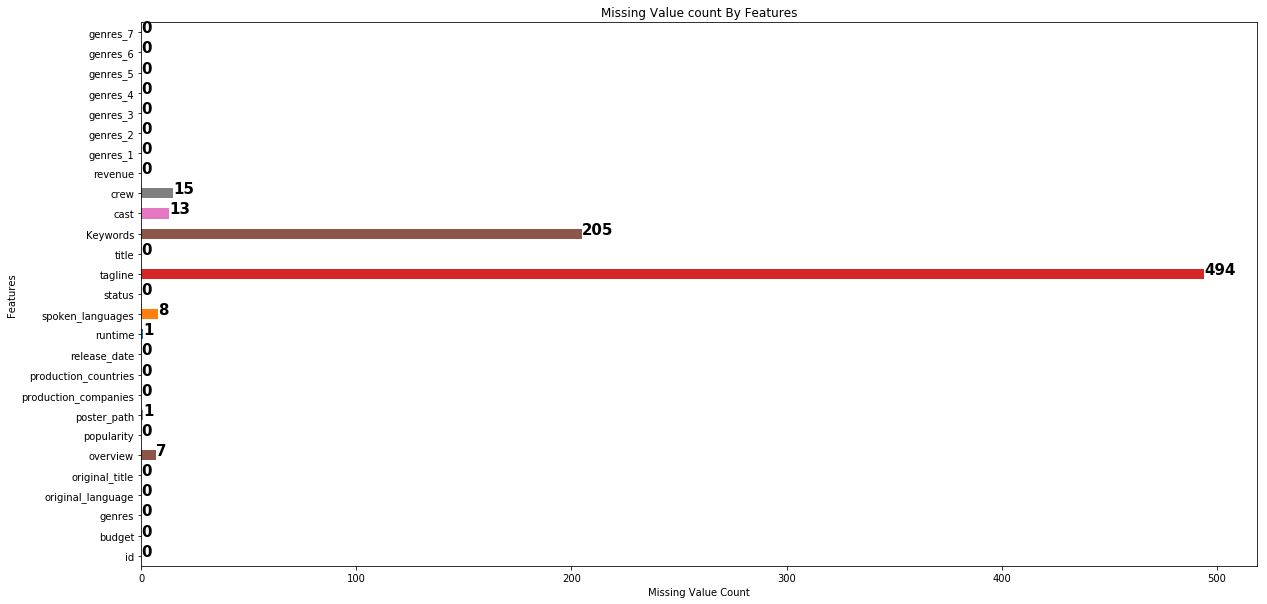

In [14]:
df.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(df.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

#### Find co related features

In [15]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

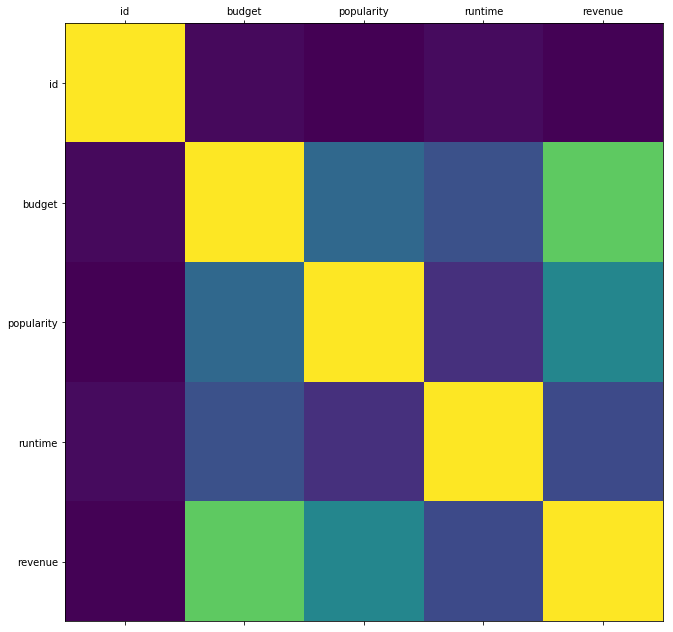

In [16]:
plot_corr(df)

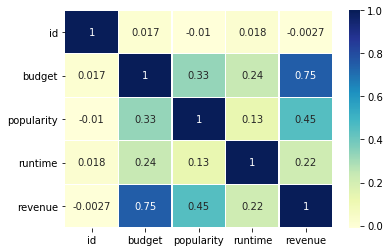

In [17]:
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True, linewidths = 0.2)

#### Lets explore our data more via charts

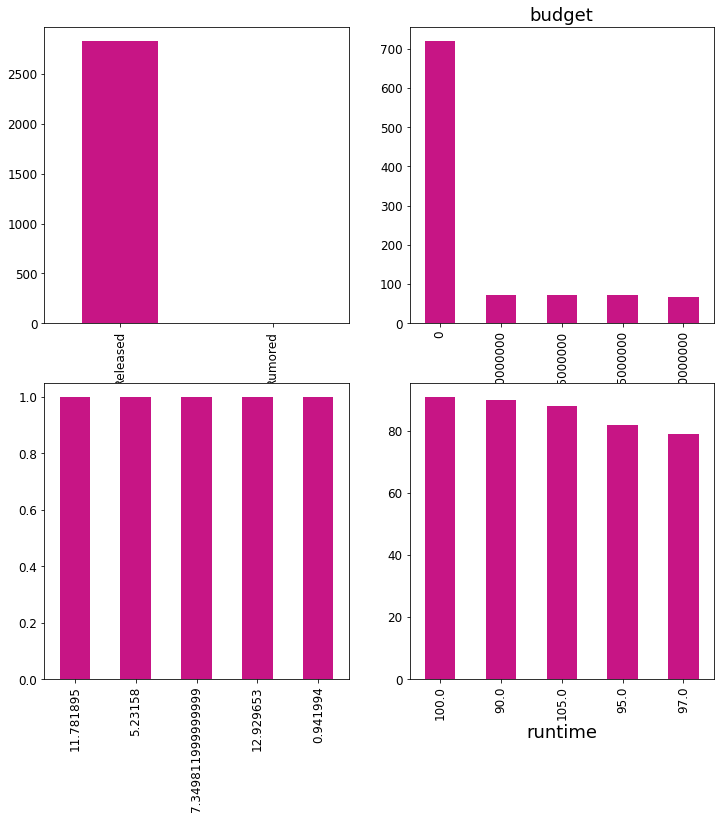

In [18]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

df['status'].value_counts().head(5).plot.bar(ax=axarr[0][0], fontsize=12, color='mediumvioletred')
ax=axarr[0][0].set_xlabel("status", fontsize=18)
df['budget'].value_counts().head(5).plot.bar(ax=axarr[0][1], fontsize=12, color='mediumvioletred')
ax=axarr[0][1].set_title("budget", fontsize=18)
df['popularity'].value_counts().head(5).plot.bar(ax=axarr[1][0], fontsize=12, color='mediumvioletred')
ax=axarr[1][1].set_xlabel("popularity", fontsize=18)
df['runtime'].value_counts().head(5).plot.bar(ax=axarr[1][1], fontsize=12, color='mediumvioletred')
ax=axarr[1][1].set_xlabel("runtime", fontsize=18)


#### Feature Analysis

#### 1. Budget

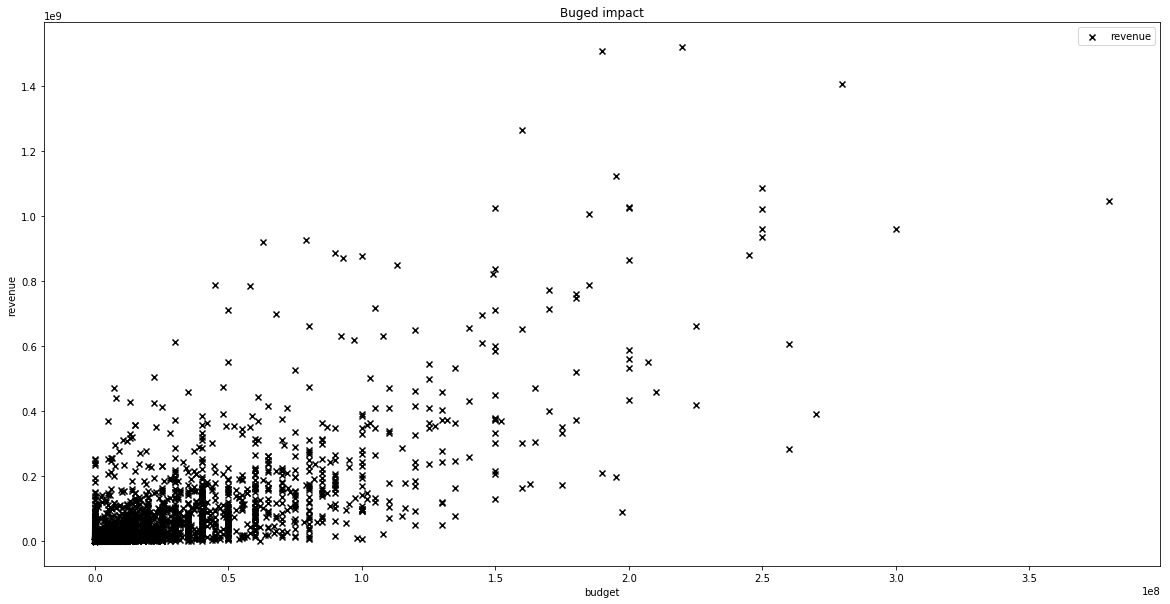

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['budget'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Buged impact')
plt.legend()
plt.show()

#### 2. Popularity

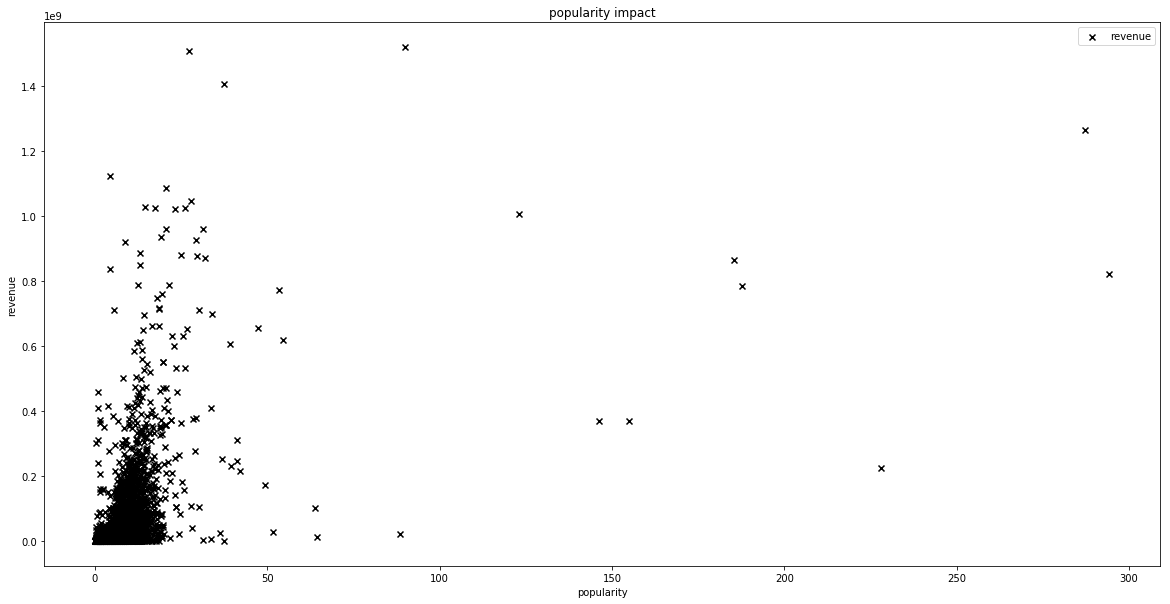

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['popularity'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('popularity')
plt.ylabel('revenue')
plt.title('popularity impact')
plt.legend()
plt.show()

#### 3. Runtime

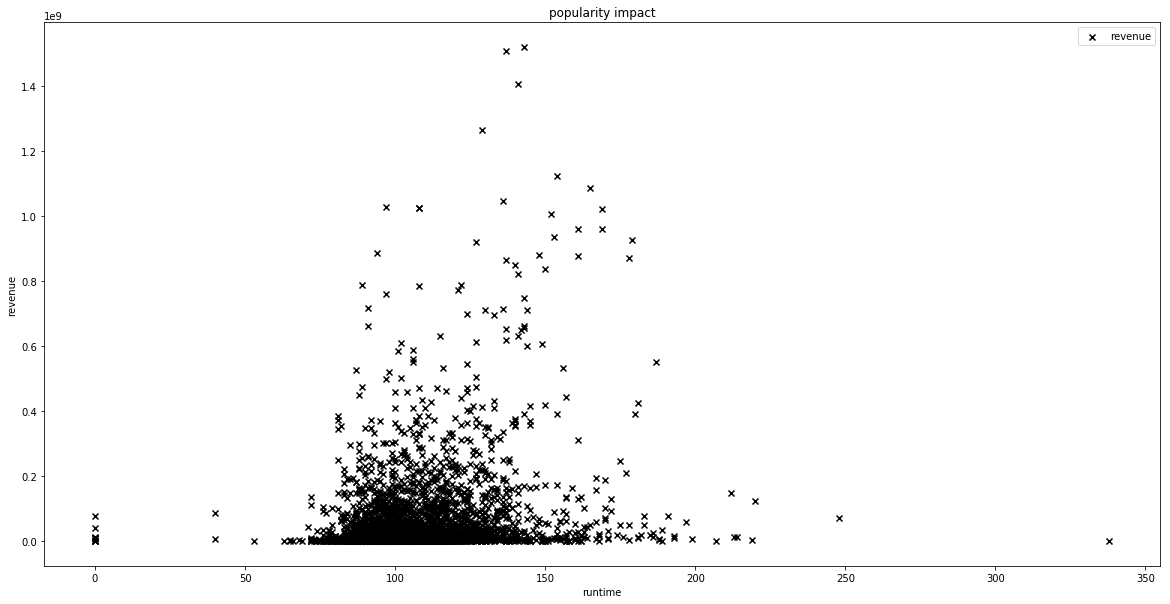

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['runtime'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('runtime')
plt.ylabel('revenue')
plt.title('popularity impact')
plt.legend()
plt.show()

##### 4. Language

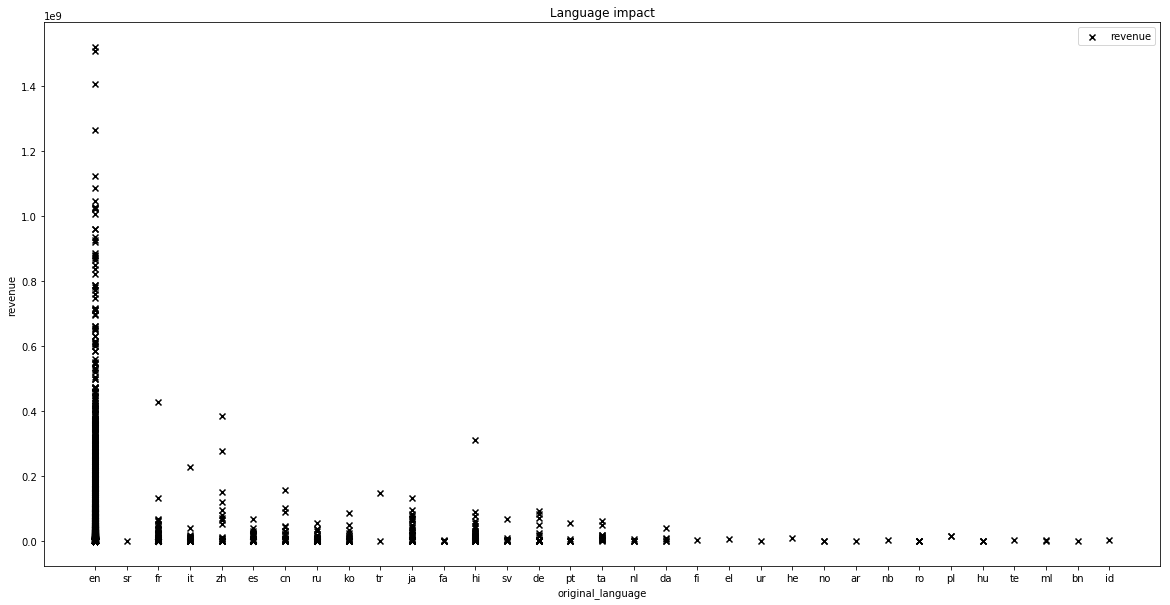

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['original_language'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('original_language')
plt.ylabel('revenue')
plt.title('Language impact')
plt.legend()
plt.show()

##### Genres 

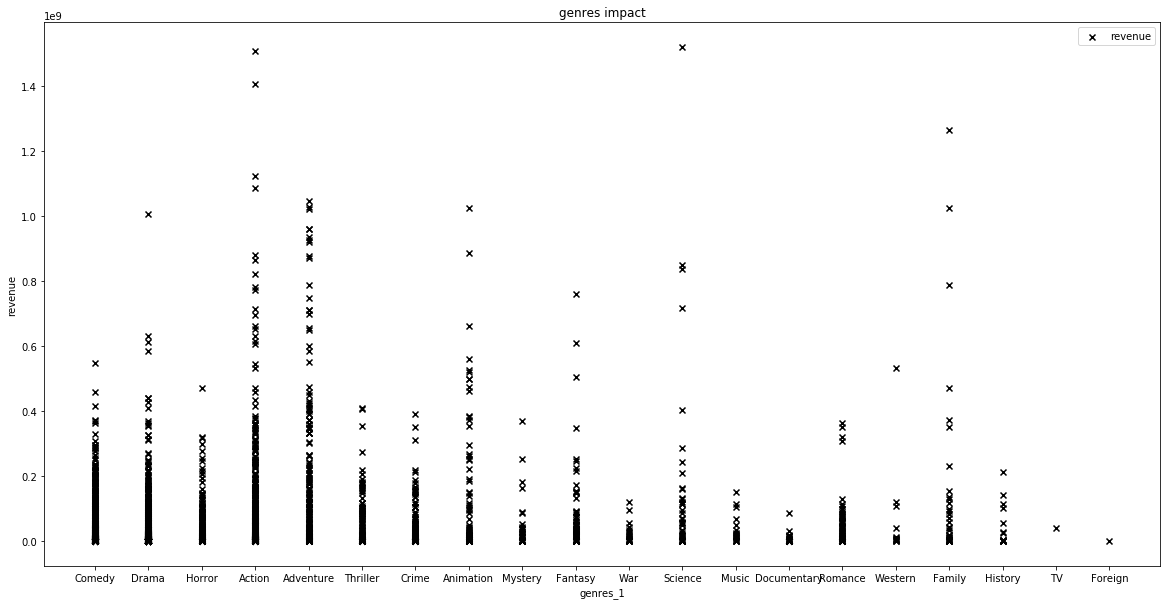

In [23]:
plt.figure(figsize=(20,10))
plt.scatter(x = df['genres_1'], y = df['revenue'], marker = 'x', color = 'black')

plt.xlabel('genres_1')
plt.ylabel('revenue')
plt.title('genres impact')
plt.legend()
plt.show()

In [24]:
#X = df.loc[:,df.columns!='revenue']
#y = df['revenue']

df.status = pd.get_dummies(df.status)

df = df[['runtime', 'budget','popularity','status']]
df.isna().any()

runtime        True
budget        False
popularity    False
status        False
dtype: bool

#### Removing Null values from runtime

In [25]:
# ffill: propagate last valid observation forward to next valid
# mean: takes mean of non-zero column and replaces zero with those. This should be modified
#df['runtime'] = df['runtime'].fillna(method='ffill')
mean_runtime = df['runtime'].mean(skipna=True)
mean_budget = df['budget'].mean(skipna=True)
df['runtime'] = df.runtime.replace(0, mean_runtime)
df['budget'] = df.budget.replace(0, mean_budget)
df.isna().any()

runtime        True
budget        False
popularity    False
status        False
dtype: bool

#### Check for 0 or Null values

In [26]:
#'runtime', 'budget','popularity','status'

print("# rows in dataframe {0}".format(len(df)))
print("# rows null = %s, # of 0 = %s runtime" %(len(df.loc[df['runtime'].isnull()]), len(df.loc[df['runtime'] == 0])))
print("# rows null = %s, # of 0 = %s budget" %(len(df.loc[df['budget'].isnull()]), len(df.loc[df['budget'] == 0])))
print("# rows null = %s, # of 0 = %s popularity" %(len(df.loc[df['popularity'].isnull()]), len(df.loc[df['popularity']== 0])))
print("# rows null = %s, # of 0 = %s status" %(len(df.loc[df['status'].isnull()]), len(df.loc[df['status'] == 0])))

# rows in dataframe 2833
# rows null = 1, # of 0 = 0 runtime
# rows null = 0, # of 0 = 0 budget
# rows null = 0, # of 0 = 0 popularity
# rows null = 0, # of 0 = 1 status


In [28]:
X = df[['runtime', 'budget','popularity','status']]
y = df_modified.revenue

In [29]:
X[:2]

,runtime,budget,popularity,status
0,93.0,14000000.0,6.575393,1
1,113.0,40000000.0,8.248895,1


In [30]:
y[:2]

0    12314651
1    95149435
Name: revenue, dtype: int64

#### Split training data into training and test data

In [31]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val,y_train, y_val = train_test_split(X,y,test_size = 0.30, random_state = 42)

ValueError: Found input variables with inconsistent numbers of samples: [2833, 3000]

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_val)/len(df.index)) * 100))

### Prepare the model

##### Declare method used during model generic

RMSLE method to calculate RMSLE

In [32]:
import numpy as np

def rmsle(y_v,y_p): 
    return np.sqrt(np.mean(np.square(np.log1p(y_v)-np.log1p(y_p)))) 

##### Plot graph 

In [33]:
from matplotlib import pyplot

def printResult(X, y, pred, xLabel, yLabel, title):
    pyplot.scatter(X,y)
    pyplot.plot(np.sort(X,axis=0), pred)
    pyplot.xlabel(xLabel)
    pyplot.ylabel(yLabel)
    pyplot.title(title)
    pyplot.legend()
    pyplot.show()

#### 1. Linear Model

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_val)
print("RMSLE(used in Kaggle competition) score of Linear Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(lr_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

NameError: name 'X_train' is not defined

#### Training Data Output

In [ ]:
test = pd.read_csv('test.csv/test.csv')
test['runtime'] = test['runtime'].fillna(method='ffill')
test["status"] = pd.get_dummies(test.status)
test = test[['runtime', 'budget','popularity','status']]

y_LR_prediction = lr_model.predict(test)

sub_lr = pd.read_csv('sample_submission.csv')
sub_lr['revenue'] = y_LR_prediction
sub_lr.to_csv('LR_Submission.csv', index=False)

#### 2. RandomForestRegressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_val)
print("RMSLE score of Random Forest Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(rf_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_RF_prediction = rf_model.predict(test)

sub_lr['revenue'] = y_RF_prediction
sub_lr.to_csv('RF_Submission.csv', index=False)

#### 3. KNeighborsRegressor

The target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

kn_model = KNeighborsRegressor()
kn_model.fit(X_train, y_train)

y_pred = kn_model.predict(X_val)
print("RMSLE score of KNeighborsRegressor Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(kn_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_kn_prediction = kn_model.predict(test)

sub_lr['revenue'] = y_kn_prediction
sub_lr.to_csv('KN_Submission.csv', index=False)

#### 4. XGBRegressor

In [ ]:
from xgboost import XGBRegressor

xg_regressor_model = XGBRegressor()
xg_regressor_model.fit(X_train, y_train)

y_pred = xg_regressor_model.predict(X_val)
print("RMSLE score of XGBRegressor Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(xg_regressor_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))

printResult(X_val.runtime, y_val, y_pred, 'runtime', 'revenue', 'Runtime impact on revnue')
printResult(X_val.budget, y_val, y_pred, 'budget', 'revenue', 'budget impact on revnue')
printResult(X_val.popularity, y_val, y_pred, 'popularity', 'revenue', 'popularity impact on revnue')

##### Training Data Output

In [ ]:
y_xg_regressor_prediction = xg_regressor_model.predict(test)

sub_lr['revenue'] = y_xg_regressor_prediction
sub_lr.to_csv('XGBoost_Regressor_Submission.csv', index=False)

#### 5. XGBClassifier

In [ ]:
"""from xgboost import XGBClassifier

xg_classifier_model = XGBClassifier()
xg_classifier_model.fit(X_train, y_train)

y_pred = xg_classifier_model.predict(X_val)
print("RMSLE score of XGBClassifier Model is {}".format(rmsle(y_val,y_pred)))
print("Accuracy: {0:.4f}".format(xg_classifier_model.score(X_val,y_val)))
print("MAE: {0:.4f}".format(mean_absolute_error(y_pred, y_val)))"""

In [ ]:
"""y_xg_classifier_prediction = xg_classifier_model.predict(test)

sub_lr['revenue'] = y_xg_classifier_prediction
sub_lr.to_csv('XGBoost_Regressor_Submission.csv', index=False)"""

#### "End Of Project" Check the directory, all the o/p files will be present there. We can upload the best one in the competition